In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split

In [49]:
warnings.filterwarnings('ignore')

In [50]:
data_path = '/home/oracle_48/diabetes_dataset.csv'
df = pd.read_csv(data_path)
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

   age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                 215         5.7  ...               41   
1                                 143         6.7  ...               55   
2                

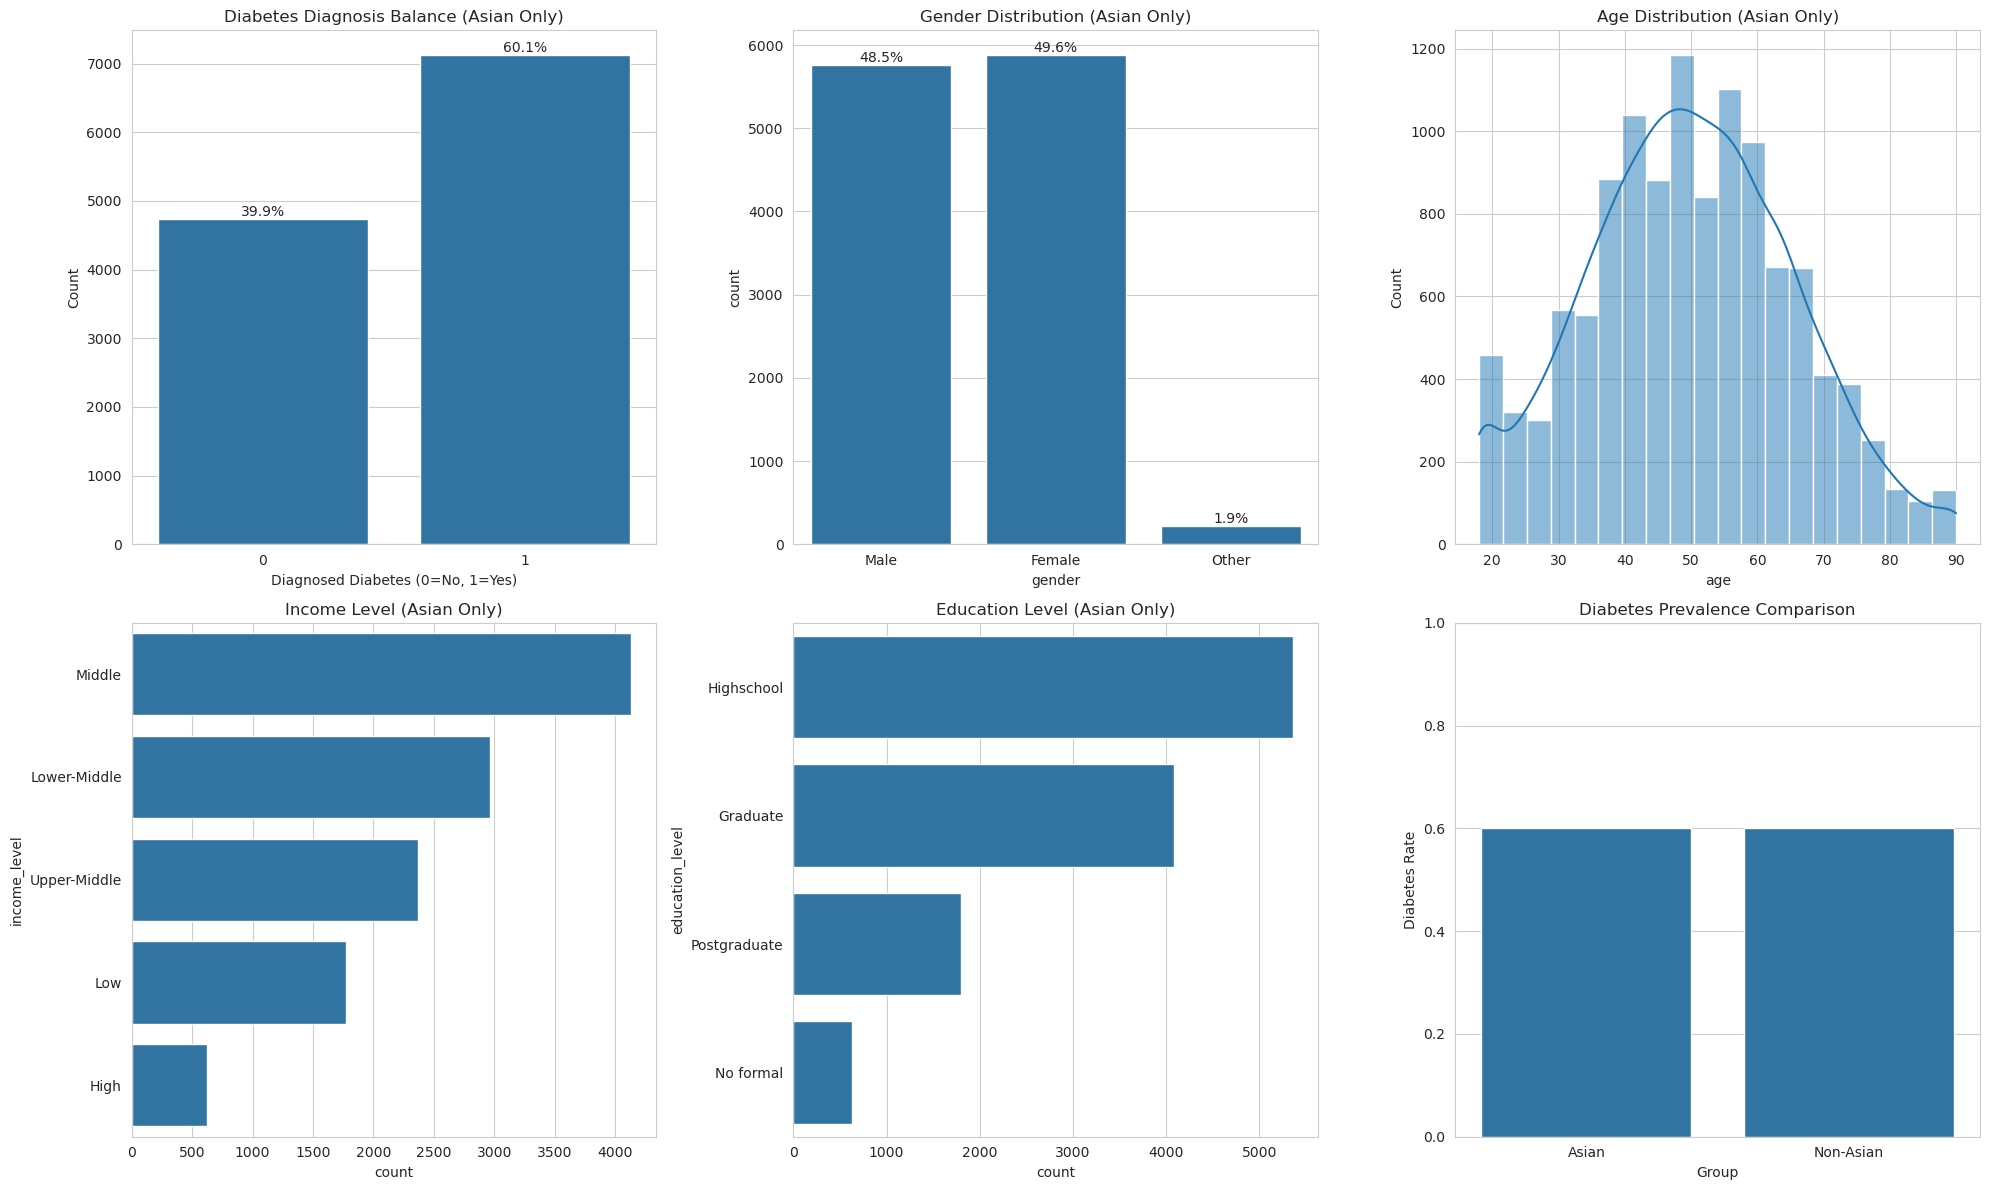

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv('diabetes_dataset.csv')

# Display the first few rows and the info of the dataframe
print(df.head())
print(df.info())

# Filter for Asian data
asian_df = df[df['ethnicity'] == 'Asian']
non_asian_df = df[df['ethnicity'] != 'Asian']

# Set up the figure for Asian-specific analysis
plt.figure(figsize=(20, 12))

# 1. Target Variable Balance within Asians
plt.subplot(2, 3, 1)
ax1 = sns.countplot(data=asian_df, x='diagnosed_diabetes')
plt.title('Diabetes Diagnosis Balance (Asian Only)')
plt.xlabel('Diagnosed Diabetes (0=No, 1=Yes)')
plt.ylabel('Count')
# Add percentage labels
total_asian = len(asian_df)

for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_asian)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center', va='bottom')
    
    
# 2. Gender Balance within Asians
plt.subplot(2, 3, 2)
ax2 = sns.countplot(data=asian_df, x='gender')
plt.title('Gender Distribution (Asian Only)')
# Add percentage labels
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_asian)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax2.annotate(percentage, (x, y), ha='center', va='bottom')

# 3. Age Distribution within Asians
plt.subplot(2, 3, 3)
sns.histplot(data=asian_df, x='age', bins=20, kde=True)
plt.title('Age Distribution (Asian Only)')

# 4. Income Level Distribution within Asians
plt.subplot(2, 3, 4)
income_order = ['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High'] # Assuming these might be the levels, let's check or rely on auto-sort if unknown, but better to order if possible. 
# Let's check unique values first in the print, but for plot, let's stick to default or value counts order for safety if order is unknown.
sns.countplot(data=asian_df, y='income_level', order=asian_df['income_level'].value_counts().index)
plt.title('Income Level (Asian Only)')

# 5. Education Level Distribution within Asians
plt.subplot(2, 3, 5)
sns.countplot(data=asian_df, y='education_level', order=asian_df['education_level'].value_counts().index)
plt.title('Education Level (Asian Only)')

# 6. Comparison of Target Rate: Asian vs Rest (To answer "How do we know it's balanced?")
# We'll show the mean diagnosed rate for Asian vs Others again for clarity
plt.subplot(2, 3, 6)
comparison_data = pd.DataFrame({
    'Group': ['Asian', 'Non-Asian'],
    'Diabetes Rate': [asian_df['diagnosed_diabetes'].mean(), non_asian_df['diagnosed_diabetes'].mean()]
})
sns.barplot(data=comparison_data, x='Group', y='Diabetes Rate')
plt.title('Diabetes Prevalence Comparison')
plt.ylim(0, 1)

plt.tight_layout()
plt.savefig('asian_internal_balance_check.png')

# Print specific stats to text response
print("Asian Subset Statistics:")
print(f"Total Count: {len(asian_df)}")
print(f"Diabetes Rate: {asian_df['diagnosed_diabetes'].mean():.4f}")
print("\nGender Counts:")
print(asian_df['gender'].value_counts(normalize=True))
print("\nIncome Counts:")
print(asian_df['income_level'].value_counts(normalize=True))
print("\nEducation Counts:")
print(asian_df['education_level'].value_counts(normalize=True))

In [53]:
df = pd.read_csv('/home/oracle_48/diabetes_dataset.csv')
data = df[df['ethnicity'] == 'Asian'].copy()

print(data)

print(data.info())

       age  gender ethnicity education_level  income_level employment_status  \
0       58    Male     Asian      Highschool  Lower-Middle          Employed   
14      22    Male     Asian      Highschool  Lower-Middle          Employed   
39      53  Female     Asian      Highschool  Lower-Middle          Employed   
46      43    Male     Asian      Highschool  Upper-Middle          Employed   
49      22    Male     Asian      Highschool  Upper-Middle          Employed   
...    ...     ...       ...             ...           ...               ...   
99946   50  Female     Asian    Postgraduate        Middle          Employed   
99958   64    Male     Asian      Highschool  Lower-Middle           Retired   
99979   67  Female     Asian    Postgraduate        Middle          Employed   
99984   71  Female     Asian        Graduate        Middle           Retired   
99987   21   Other     Asian      Highschool  Lower-Middle           Retired   

      smoking_status  alcohol_consumpti

In [54]:
print(data.isnull().sum()) #결측치 0

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


In [55]:
plt.figure(figsize=(20, 12))
sns.set_style("whitegrid")


def print_count_and_ratio(df, col_name, col_label):
    counts = df[col_name].value_counts()
    ratios = df[col_name].value_counts(normalize=True) * 100
    
    print(f"\n--- {col_label} ({col_name}) ---")
    summary = pd.DataFrame({'Count': counts, 'Ratio (%)': ratios})
    print(summary)
    return summary

<Figure size 2000x1200 with 0 Axes>

Text(0, 0.5, 'Count')

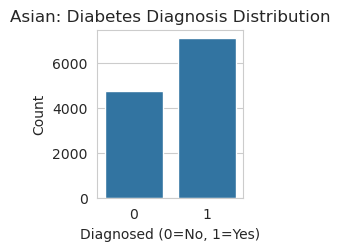

In [56]:
plt.subplot(2, 3, 1)
sns.countplot(data=asian_df, x='diagnosed_diabetes')
plt.title('Asian: Diabetes Diagnosis Distribution')
plt.xlabel('Diagnosed (0=No, 1=Yes)')
plt.ylabel('Count')

In [57]:
print(f"Total Asian Samples: {len(asian_df)}")


print_count_and_ratio(asian_df, 'diabetes_stage', 'Diabetes Stage')
print_count_and_ratio(asian_df, 'smoking_status', 'Smoking Status')

Total Asian Samples: 11865

--- Diabetes Stage (diabetes_stage) ---
                Count  Ratio (%)
diabetes_stage                  
Type 2           7106  59.890434
Pre-Diabetes     3804  32.060683
No Diabetes       913   7.694901
Gestational        33   0.278129
Type 1              9   0.075853

--- Smoking Status (smoking_status) ---
                Count  Ratio (%)
smoking_status                  
Never            7081  59.679730
Former           2393  20.168563
Current          2391  20.151707


,Count,Ratio (%)
smoking_status,,
Never,7081,59.679730
Former,2393,20.168563
Current,2391,20.151707


In [58]:
print_count_and_ratio(asian_df, 'diagnosed_diabetes', 'Diabetes Diagnosis')


--- Diabetes Diagnosis (diagnosed_diabetes) ---
                    Count  Ratio (%)
diagnosed_diabetes                  
1                    7128  60.075853
0                    4737  39.924147


,Count,Ratio (%)
diagnosed_diabetes,,
1,7128,60.075853
0,4737,39.924147


In [59]:
print_count_and_ratio(asian_df, 'gender', 'Gender')


--- Gender (gender) ---
        Count  Ratio (%)
gender                  
Female   5883  49.582807
Male     5757  48.520860
Other     225   1.896334


,Count,Ratio (%)
gender,,
Female,5883,49.582807
Male,5757,48.520860
Other,225,1.896334


                               Feature        Test        p-value  Significant
24                glucose_postprandial      T-test   0.000000e+00         True
26                               hba1c      T-test   0.000000e+00         True
23                     glucose_fasting      T-test   0.000000e+00         True
5              family_history_diabetes  Chi-square  1.929204e-101         True
8                                  age      T-test   4.105763e-47         True
14                                 bmi      T-test   1.010506e-32         True
15                  waist_to_hip_ratio      T-test   4.325768e-29         True
16                         systolic_bp      T-test   5.721968e-29         True
10  physical_activity_minutes_per_week      T-test   2.807990e-28         True
21                     ldl_cholesterol      T-test   1.649050e-11         True
22                       triglycerides      T-test   4.189279e-11         True
25                       insulin_level      T-test  

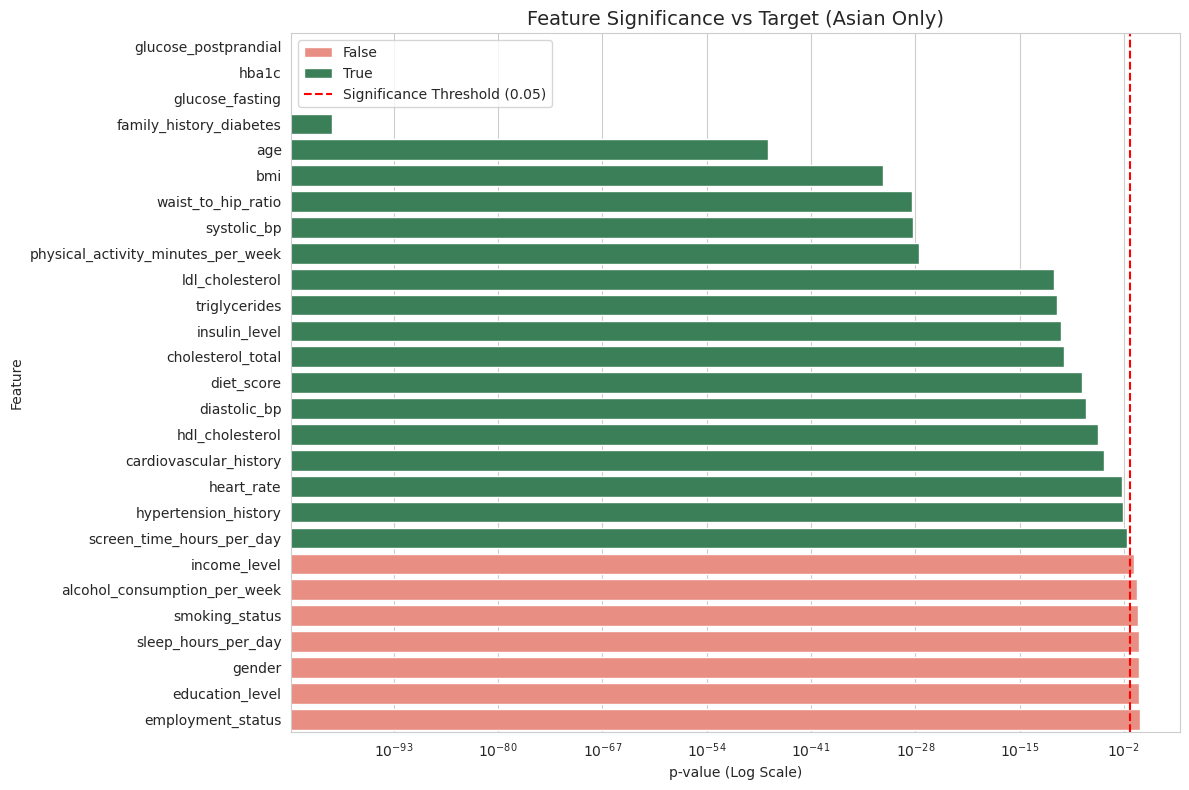

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu

# 1. Load and Filter Data
df = pd.read_csv('diabetes_dataset.csv')
asian_df = df[df['ethnicity'] == 'Asian'].copy()

# 2. Define Target and Feature types
target_col = 'diagnosed_diabetes'

# Exclude target and ID-like or leakage columns if any (like diabetes_stage as discussed)
# Also excluding 'ethnicity' since it's all 'Asian' now.
exclude_cols = [target_col, 'diabetes_stage', 'ethnicity', 'diabetes_risk_score'] 
# Note: keeping risk score might be redundant if we are building our own, but for EDA let's check everything else.
# Actually, let's exclude 'diabetes_risk_score' if the user wants to build their own model from raw features.
# But for "checking significance", let's check the raw input features.

numeric_cols = asian_df.select_dtypes(include=['int64', 'float64']).columns.drop([target_col, 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diabetes_risk_score'], errors='ignore')
# Binary/Categorical features often stored as int/object
categorical_cols = asian_df.select_dtypes(include=['object']).columns.drop(['diabetes_stage', 'ethnicity'], errors='ignore')
# Add binary history cols to categorical for chi-square (or just treat as categorical)
binary_cols = ['family_history_diabetes', 'hypertension_history', 'cardiovascular_history']

results = []

# 3. Statistical Tests

# 3.1 Chi-Square for Categorical & Binary
for col in list(categorical_cols) + binary_cols:
    if col in asian_df.columns:
        contingency = pd.crosstab(asian_df[col], asian_df[target_col])
        chi2, p, dof, expected = chi2_contingency(contingency)
        results.append({"Feature": col, "Test": "Chi-square", "p-value": p, "Significant": p < 0.05})

# 3.2 T-Test (or Mann-Whitney) for Numerical
for col in numeric_cols:
    if col in asian_df.columns:
        group0 = asian_df[asian_df[target_col] == 0][col]
        group1 = asian_df[asian_df[target_col] == 1][col]
        
        # Using T-test for simplicity, though Mann-Whitney is safer for non-normal. 
        # Let's use T-test as in the reference code provided by user.
        stat, p = ttest_ind(group0, group1, nan_policy='omit')
        results.append({"Feature": col, "Test": "T-test", "p-value": p, "Significant": p < 0.05})

results_df = pd.DataFrame(results).sort_values('p-value')

# 4. Visualization
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, x="p-value", y="Feature", hue="Significant", dodge=False, palette={True:"seagreen", False:"salmon"})
plt.axvline(0.05, color="red", linestyle="--", label="Significance Threshold (0.05)")
plt.title("Feature Significance vs Target (Asian Only)", fontsize=14)
plt.xscale('log') # Use log scale because some p-values are extremely small
plt.xlabel("p-value (Log Scale)")
plt.legend()
plt.tight_layout()
plt.savefig('asian_feature_significance.png')

print(results_df)

In [61]:
df['diagnosed_diabetes'] = df['diagnosed_diabetes'].map({0: 'Negative', 1: 'Positive'})
df['family_history_diabetes'] = df['family_history_diabetes'].map({0: 'No', 1: 'Yes'})
df['hypertension_history'] = df['hypertension_history'].map({0: 'No', 1: 'Yes'})
df['cardiovascular_history'] = df['cardiovascular_history'].map({0: 'No', 1: 'Yes'})

In [62]:
categorical_features=[]
numerical_features=[] 
for col in df.columns : 
    if len(df[col].unique()) > 6 : 
        numerical_features.append(col) 
    else : 
        categorical_features.append(col) 

In [63]:
for i in categorical_features : 
    if i not in  ['name' , 'description'] : 
        print(f"{i} : {np.unique(df[i])}\n")

gender : ['Female' 'Male' 'Other']

ethnicity : ['Asian' 'Black' 'Hispanic' 'Other' 'White']

education_level : ['Graduate' 'Highschool' 'No formal' 'Postgraduate']

income_level : ['High' 'Low' 'Lower-Middle' 'Middle' 'Upper-Middle']

employment_status : ['Employed' 'Retired' 'Student' 'Unemployed']

smoking_status : ['Current' 'Former' 'Never']

family_history_diabetes : ['No' 'Yes']

hypertension_history : ['No' 'Yes']

cardiovascular_history : ['No' 'Yes']

diabetes_stage : ['Gestational' 'No Diabetes' 'Pre-Diabetes' 'Type 1' 'Type 2']

diagnosed_diabetes : ['Negative' 'Positive']



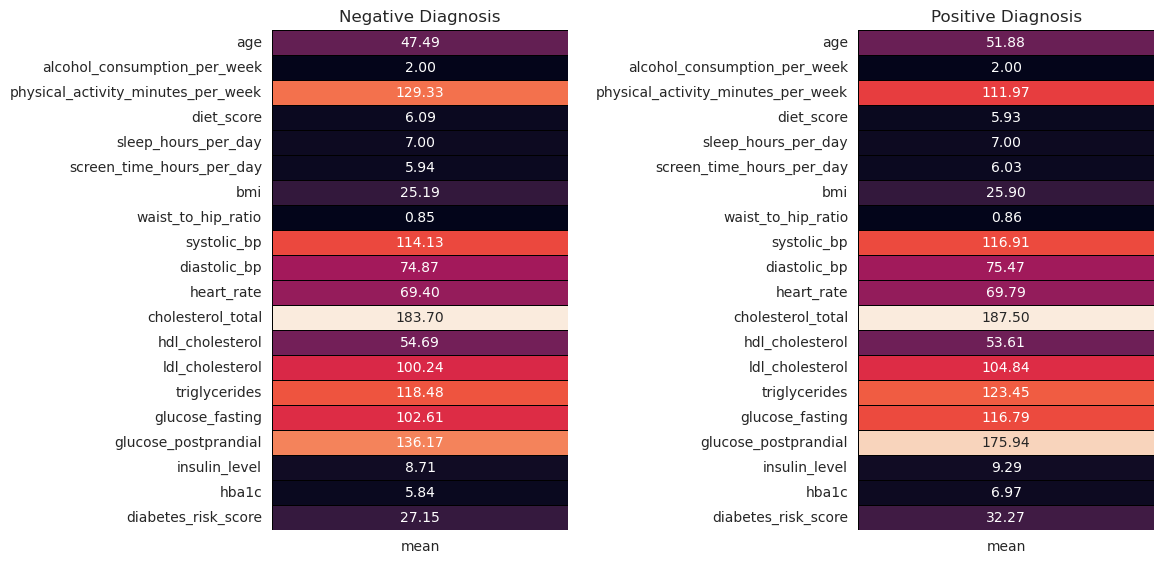

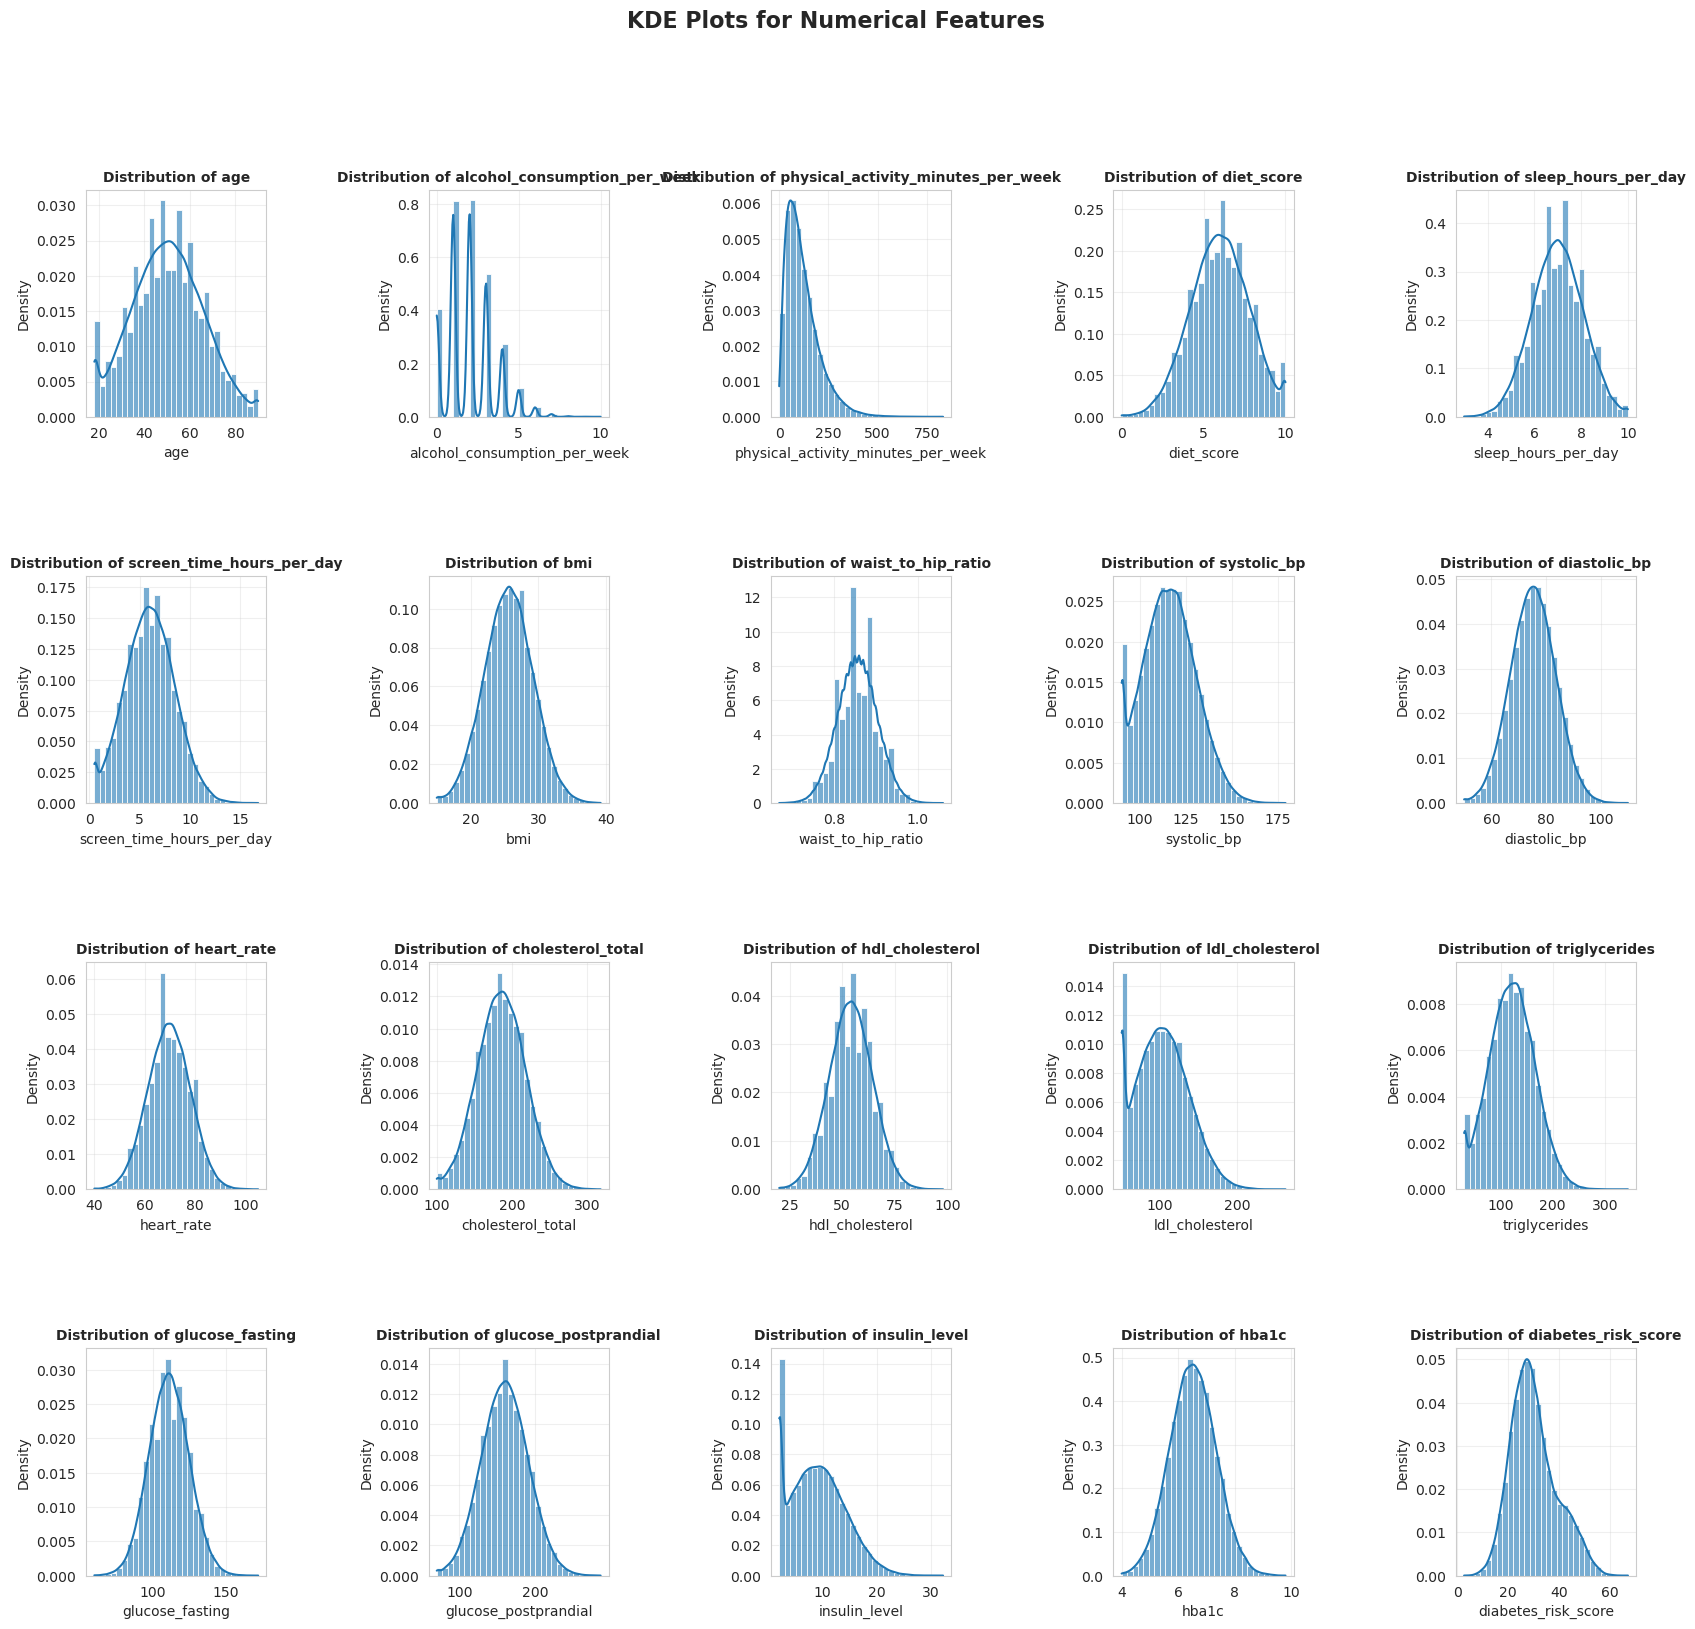

In [64]:
import math

n = df[df['diagnosed_diabetes'] == 'Negative'].describe().T
p = df[df['diagnosed_diabetes'] == 'Positive'].describe().T 

fig , ax = plt.subplots(nrows = 1 , ncols = 2 , figsize = (12, 6)) 
plt.subplot(1 , 2 ,1) 
sns.heatmap(n[['mean']],annot = True,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Negative Diagnosis');

plt.subplot(1,2,2)
sns.heatmap(p[['mean']],annot = True,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Positive Diagnosis');

fig.tight_layout(pad = 2)

n_rows = math.ceil(len(numerical_features) / 5)
fig, ax = plt.subplots(figsize=(20, 18), nrows=n_rows, ncols=5)
ax = ax.flatten()


for idx, col in enumerate(numerical_features):
    
    sns.histplot(
        data=df[col],
        bins=30,
        kde=True,      
        stat='density',
        ax=ax[idx] , 
        alpha=0.6
    )
    

    ax[idx].set_title(f'Distribution of {col}', fontsize=10, weight='bold')
    ax[idx].set_xlabel(col)
    ax[idx].set_ylabel('Density')
    ax[idx].grid(alpha=0.3)

fig.suptitle("KDE Plots for Numerical Features", fontsize=16, weight='bold')
fig.subplots_adjust(hspace=0.7, wspace=0.9)
plt.show()